# ***IMPORT LIBRARY***

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

# ***PREPROCESSING***

In [2]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1./255)

In [3]:
train_set=train.flow_from_directory('/content/drive/MyDrive/faceID/train',target_size = (64,64),batch_size = 12,class_mode = 'categorical')
test_set=validation.flow_from_directory('/content/drive/MyDrive/faceID/test',target_size = (64,64),batch_size = 12,class_mode = 'categorical')

Found 41 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
train_set.class_indices

{'me': 0, 'someone else': 1}

# ***CREATE MODEL***

In [5]:
model = tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape =(64,64,3)),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),
     
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_uniform'),
      tf.keras.layers.Dense(2,activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                    

In [6]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# ***TRAINNING MODEL***

In [7]:
history = model.fit(train_set,batch_size=128,epochs=20,verbose=1,validation_data=test_set)

Epoch 1/20
4/4 [==============================] - 29s 9s/step - loss: 0.7561 - accuracy: 0.4146 - val_loss: 0.5138 - val_accuracy: 0.9500
Epoch 2/20
4/4 [==============================] - 4s 902ms/step - loss: 0.4939 - accuracy: 0.8293 - val_loss: 0.4018 - val_accuracy: 0.9000
Epoch 3/20
4/4 [==============================] - 4s 971ms/step - loss: 0.3469 - accuracy: 0.8780 - val_loss: 0.2836 - val_accuracy: 0.9500
Epoch 4/20
4/4 [==============================] - 4s 873ms/step - loss: 0.2085 - accuracy: 0.9512 - val_loss: 0.1916 - val_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 4s 925ms/step - loss: 0.1637 - accuracy: 0.9756 - val_loss: 0.1503 - val_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 4s 865ms/step - loss: 0.1400 - accuracy: 0.9512 - val_loss: 0.1054 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 4s 966ms/step - loss: 0.0982 - accuracy: 0.9756 - val_loss: 0.0790 - val_accuracy: 1.0000
Epoch 8/20
4/4 [======

# ***EVALUATE***

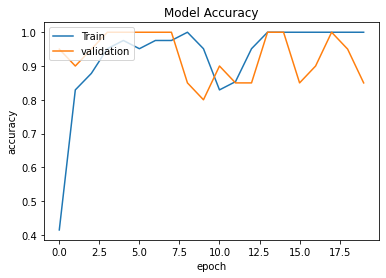

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [9]:
score=model.evaluate(test_set,verbose=1)
print('Loss: ',score[0])
print('Accuracy: ',score[1])

2/2 [==============================] - 1s 370ms/step - loss: 0.2171 - accuracy: 0.8500
Loss:  0.2170860469341278
Accuracy:  0.8500000238418579


# ***TESTING***

In [10]:
model.save('face.h5')

In [11]:
from tensorflow.keras.models import load_model
model1=load_model('face.h5')

dự đoán: me


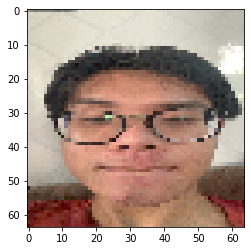

In [13]:
test_img=load_img('/content/drive/MyDrive/faceID/validate/me/280322245_1621816304860464_200896941899762867_n.png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
  prediction="me"
elif round(result[0][1])==1:
  prediction="someone else"

print('dự đoán:', prediction)

dự đoán: someone else


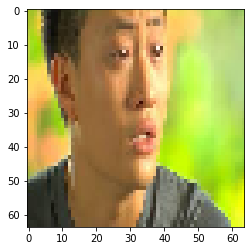

In [14]:
test_img=load_img('/content/drive/MyDrive/faceID/validate/someone else/image (28).png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
  prediction="me"
elif round(result[0][1])==1:
  prediction="someone else"

print('dự đoán:', prediction)

dự đoán: someone else


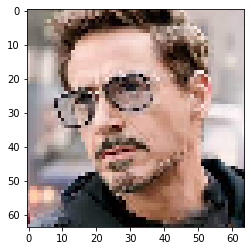

In [15]:
test_img=load_img('/content/drive/MyDrive/faceID/validate/someone else/image.png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
  prediction="me"
elif round(result[0][1])==1:
  prediction="someone else"

print('dự đoán:', prediction)